# WW2 Data Analysis

The main question answered will be is there a relationship between the daily minimum and maximum temperature? Can you predict the maximum temperature given the minimum temperature?

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data_add = r'../../../Downloads/Datasets/weatherww2/summ_of_weather.csv'
df = pd.read_csv(data_add)
df

/home/hj/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dropna(subset=["MinTemp"])

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
pd.set_option('display.max_columns', None)
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


In [5]:
df.drop(['FT', 'FB', 'FTI', 'ITH', 'SD3', 'RHX', "RHN", 'RVG', 'WTE'], axis = 1, inplace = True)

In [6]:
df.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,MAX,MIN,MEA,SND,PGT
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,525.000000
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,12.085333
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,5.731328
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,0.000000
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,8.500000
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,11.600000
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,15.000000
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,23.900000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 22 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
PGT            525 non-null float64
TSHDSBRSGF     34237 non-null object
dtypes: float64(11), int64(4), object(7)
memory usage: 20.0+ M

In [8]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

STA
False    119040
Name: STA, dtype: int64

Date
False    119040
Name: Date, dtype: int64

Precip
False    119040
Name: Precip, dtype: int64

WindGustSpd
True     118508
False       532
Name: WindGustSpd, dtype: int64

MaxTemp
False    119040
Name: MaxTemp, dtype: int64

MinTemp
False    119040
Name: MinTemp, dtype: int64

MeanTemp
False    119040
Name: MeanTemp, dtype: int64

Snowfall
False    117877
True       1163
Name: Snowfall, dtype: int64

PoorWeather
True     84803
False    34237
Name: PoorWeather, dtype: int64

YR
False    119040
Name: YR, dtype: int64

MO
False    119040
Name: MO, dtype: int64

DA
False    119040
Name: DA, dtype: int64

PRCP
False    117108
True       1932
Name: PRCP, dtype: int64

DR
True     118507
False       533
Name: DR, dtype: int64

SPD
True     118508
False       532
Name: SPD, dtype: int64

MAX
False    118566
True        474
Name: MAX, dtype: int64

MIN
False    118572
True        468
Name: MIN, dtype: int64

MEA
False    118542
True        498
Nam

In [9]:
df.replace('#VALUE!', 0, inplace = True)
avg_snowfall = df['Snowfall'].astype('float').mean(axis = 0)
avg_snowfall

0.24545195415560292

In [10]:
df['Snowfall'].replace(np.nan, avg_snowfall, inplace = True)

In [11]:
df['PRCP'].value_counts()

0       62335
T       16753
0.01     3389
0.02     2909
0.03     2015
        ...  
4.24        1
3.91        1
3.88        1
6.89        1
3.82        1
Name: PRCP, Length: 540, dtype: int64

In [12]:
df['PRCP'].replace('T', 0, inplace = True)
avg_prcp = df['PRCP'].astype('float').mean(axis = 0)
avg_prcp

0.1290876797486081

In [13]:
df['PRCP'].replace(np.nan, avg_prcp, inplace = True)

In [14]:
df['Precip'].replace('T', 0, inplace = True)
avg_prcp = df['Precip'].astype('float').mean(axis = 0)
avg_prcp

3.2256122311827964

In [15]:
df['Precip'].replace(np.nan, avg_prcp, inplace = True)

In [16]:
df[['Snowfall', 'PRCP', 'Precip']]=df[['Snowfall', 'PRCP', 'Precip']].astype('float64')

In [17]:
df[['STA','DA','YR','MO']] = df[['STA','DA','YR','MO']].astype('object')

In [18]:
df.describe()

,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PRCP,DR,SPD,MAX,MIN,MEA,SND,PGT
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,118566.000000,118572.000000,118542.000000,5563.0,525.000000
mean,3.225612,37.774534,27.045111,17.789511,22.411631,0.245452,0.129088,26.998124,20.396617,81.003745,64.273808,72.644843,0.0,12.085333
std,10.801044,10.297808,8.717817,8.334572,8.297982,2.613254,0.424925,15.221732,5.560371,14.869361,14.481498,14.211082,0.0,5.731328
min,0.000000,18.520000,-33.333333,-38.333333,-35.555556,0.000000,0.000000,2.000000,10.000000,-28.000000,-37.000000,-32.000000,0.0,0.000000
25%,0.000000,29.632000,25.555556,15.000000,20.555556,0.000000,0.000000,11.000000,16.000000,78.000000,59.000000,69.000000,0.0,8.500000
50%,0.000000,37.040000,29.444444,21.111111,25.555556,0.000000,0.000000,32.000000,20.000000,85.000000,70.000000,78.000000,0.0,11.600000
75%,0.762000,43.059000,31.666667,23.333333,27.222222,0.000000,0.050000,34.000000,23.250000,89.000000,74.000000,81.000000,0.0,15.000000
max,307.340000,75.932000,50.000000,34.444444,40.000000,86.360000,12.100000,78.000000,41.000000,122.000000,94.000000,104.000000,0.0,23.900000


In [19]:
df.drop(['PoorWeather','TSHDSBRSGF','SNF', 'SND'], axis = 1, inplace = True)

In [20]:
df.dtypes

STA             object
Date            object
Precip         float64
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall       float64
YR              object
MO              object
DA              object
PRCP           float64
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
PGT            float64
dtype: object

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [22]:
df.corr()

,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PRCP,DR,SPD,MAX,MIN,MEA,PGT
Precip,1.000000,0.340994,0.004457,0.088455,0.047061,-0.011176,0.999264,0.282265,0.340994,0.004326,0.091852,0.049224,0.071172
WindGustSpd,0.340994,1.000000,-0.124238,0.311690,0.197264,NaN,0.340994,0.351027,1.000000,-0.124238,0.311690,0.197264,0.063630
MaxTemp,0.004457,-0.124238,1.000000,0.878384,0.969048,-0.324246,0.001782,0.011875,-0.124238,1.000000,0.870594,0.968247,-0.077015
MinTemp,0.088455,0.311690,0.878384,1.000000,0.965425,-0.309853,0.086621,0.525019,0.311690,0.872096,1.000000,0.966441,0.007828
MeanTemp,0.047061,0.197264,0.969048,0.965425,1.000000,-0.325849,0.044668,0.407395,0.197264,0.965838,0.963279,1.000000,-0.022448
Snowfall,-0.011176,NaN,-0.324246,-0.309853,-0.325849,1.000000,-0.011575,NaN,NaN,-0.343112,-0.321865,-0.343551,NaN
PRCP,0.999264,0.340994,0.001782,0.086621,0.044668,-0.011575,1.000000,0.282265,0.340994,0.001415,0.089961,0.046738,0.071172
DR,0.282265,0.351027,0.011875,0.525019,0.407395,NaN,0.282265,1.000000,0.351027,0.011875,0.525019,0.407395,0.099215
SPD,0.340994,1.000000,-0.124238,0.311690,0.197264,NaN,0.340994,0.351027,1.000000,-0.124238,0.311690,0.197264,0.063630
MAX,0.004326,-0.124238,1.000000,0.872096,0.965838,-0.343112,0.001415,0.011875,-0.124238,1.000000,0.873719,0.968247,-0.077015


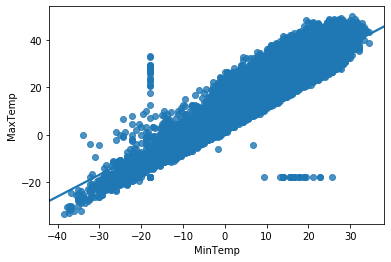

In [23]:
sns.regplot(x = 'MinTemp', y = 'MaxTemp', data = df)

In [24]:
df.drop(df[df['MaxTemp'] < df['MinTemp']].index, inplace = True )

In [25]:
df.drop(df[df['MAX'] < df['MIN']].index, inplace = True )

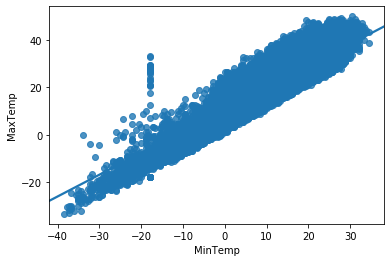

In [26]:
sns.regplot(x = 'MinTemp', y = 'MaxTemp', data = df)

In [27]:
df[['MaxTemp', 'MinTemp', 'MAX', 'MIN']].corr()

,MaxTemp,MinTemp,MAX,MIN
MaxTemp,1.000000,0.881236,1.000000,0.873734
MinTemp,0.881236,1.000000,0.872111,1.000000
MAX,1.000000,0.872111,1.000000,0.873734
MIN,0.873734,1.000000,0.873734,1.000000


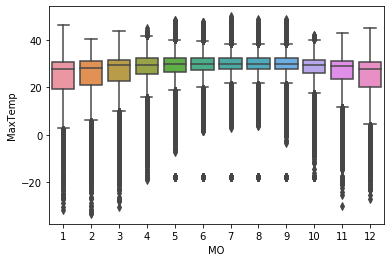

In [28]:
sns.boxplot(x = "MO", y="MaxTemp", data=df)

In [29]:
df['DR'].value_counts()

32.0    87
33.0    75
7.0     51
44.0    48
9.0     44
34.0    35
11.0    32
14.0    31
55.0    23
54.0    23
16.0    20
22.0    20
5.0     10
18.0     8
25.0     6
27.0     4
29.0     4
2.0      2
23.0     2
20.0     2
12.0     1
77.0     1
76.0     1
78.0     1
66.0     1
56.0     1
Name: DR, dtype: int64

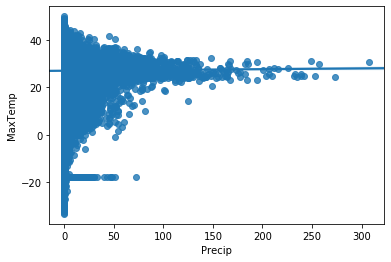

In [30]:
sns.regplot(x = 'Precip', y = 'MaxTemp', data = df)

In [31]:
df_grpdata = df[['MinTemp', 'MaxTemp', 'DR']]
df_grptest = df_grpdata.groupby(['DR'],as_index=False).mean()
df_grptest

,DR,MinTemp,MaxTemp
0,2.0,9.722222,24.166667
1,5.0,9.666667,25.222222
2,7.0,14.357298,27.516340
3,9.0,19.040404,29.621212
4,11.0,21.076389,30.659722
5,12.0,23.888889,29.444444
6,14.0,21.290323,31.146953
7,16.0,14.361111,28.777778
8,18.0,22.222222,32.847222
9,20.0,16.944444,32.500000


Pearson Coeff. and its P-values are: 0.8812361292657986 0.0


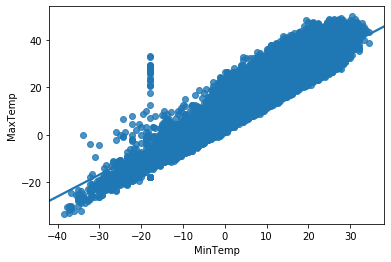

In [51]:
pearson_coeff, p_val = stats.pearsonr(df['MinTemp'], df['MaxTemp'])
print("Pearson Coeff. and its P-values are:", pearson_coeff, p_val)
sns.regplot(x = 'MinTemp', y = 'MaxTemp', data = df)

Pearson Coeff. and its P-values are: -0.32544087238168484 0.0


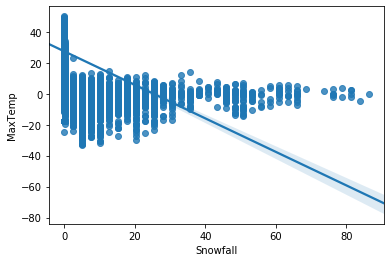

In [52]:
pearson_coeff, p_val = stats.pearsonr(df['Snowfall'], df['MaxTemp'])
print("Pearson Coeff. and its P-values are:", pearson_coeff, p_val)
sns.regplot(x = 'Snowfall', y = 'MaxTemp', data = df)

Pearson Coeff. and its P-values are: 0.004095033542036702 0.1577507877146781


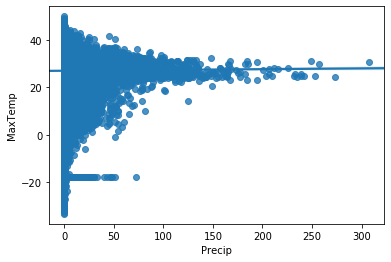

In [153]:
pearson_coeff, p_val = stats.pearsonr(df['Precip'], df['MaxTemp'])
print("Pearson Coeff. and its P-values are:", pearson_coeff, p_val)
sns.regplot(x = 'Precip', y = 'MaxTemp', data = df)

## CONCLUSION

The only singnificant variables are:
<ul>
    <li>MinTemp</li>
    <li>MaxTemp</li>
</ul>

Although, Snowfall and PRCP can be taken into consideration for some aspects. 

# MODELLING

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Linear regression model with Snowfall as predictor

In [311]:
lm1 = LinearRegression()
lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [337]:
x = df[['Snowfall']]
y = df['MaxTemp']
lm1.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [338]:
yhat1 = lm1.predict(x)

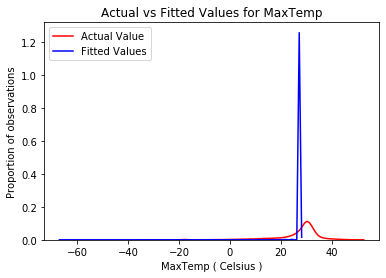

 27.322542    115703
 27.056978      1163
 21.826296       533
 24.574419       339
 19.078173       330
 16.330050       205
 13.581927        92
 5.337557         83
 8.085680         78
 10.833804        74
 2.589434         69
-0.158689         68
-2.906812         40
-5.654935         31
-22.143674        25
-27.639920        24
-24.891797        22
-11.151181        20
-8.403058         15
-38.632413        13
-13.899305        11
-44.128659        11
-19.395551        10
-30.388043        10
-41.380536         7
-33.136166         6
-16.647428         6
-55.121151         5
-35.884289         5
-60.617398         4
-57.869274         2
-63.365521         1
-52.373028         1
-46.876782         1
-66.113644         1
Name: predicted_value, dtype: int64

In [339]:
result_snow = pd.DataFrame(data = { 'actual_value': y, 'predicted_value': yhat1 })
result_snow

ax1 = sns.distplot(df['MaxTemp'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat1, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for MaxTemp')
plt.xlabel('MaxTemp ( Celsius )')
plt.ylabel('Proportion of observations')

plt.show()
plt.close()

result_snow['predicted_value'].value_counts()

In [341]:
lm1.coef_, lm1.intercept_

(array([-1.08193824]), 27.322542298612092)

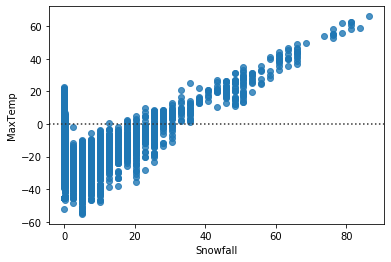

In [342]:
sns.residplot(df['Snowfall'], df['MaxTemp'])

In [332]:
#mse and R^2 of the model
r1 = lm1.score(x, y)
mse1 = mean_squared_error(df['MaxTemp'], yhat1)
print('R^2:', r1, 'MSE:', mse1)

R^2: -7.67921935675197 MSE: 67.50004519875391


### Linear regression model with Precipitation as predictor

In [343]:
lm2 = LinearRegression()
lm2

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [359]:
x = df[['Precip']]
y = df['MaxTemp']
lm2.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [360]:
yhat2 = lm2.predict(x)

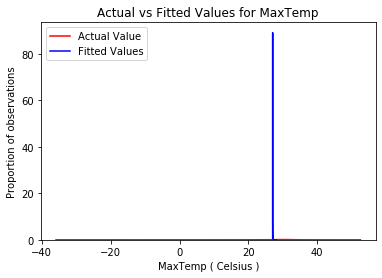

27.046326    80992
27.047163     3388
27.047999     2908
27.048836     2015
27.049672     1639
             ...  
27.587628        1
27.373450        1
27.444564        1
27.727346        1
27.653722        1
Name: predicted_value, Length: 539, dtype: int64

In [346]:
result_precip = pd.DataFrame(data = { 'actual_value': y, 'predicted_value': yhat2 })
result_precip

ax1 = sns.distplot(df['MaxTemp'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat2, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for MaxTemp')
plt.xlabel('MaxTemp ( Celsius )')
plt.ylabel('Proportion of observations')

plt.show()
plt.close()

result_precip['predicted_value'].value_counts()

In [347]:
lm2.coef_, lm2.intercept_

(array([0.00329384]), 27.046325931504693)

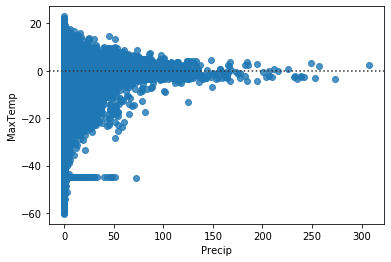

In [348]:
sns.residplot(df['Precip'], df['MaxTemp'])

In [361]:
#mse and R^2 of the model
r2 = lm2.score(x, y)
mse2 = mean_squared_error(df['MaxTemp'], yhat2)
print('R^2:', r2, 'MSE:', mse2)

R^2: 1.6769299710173158e-05 MSE: 75.49468873140322


### Linear regression model with Minimum Temperature as predictor

In [34]:
lm3 = LinearRegression()
lm3

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
x = df[['MinTemp']]
y = df['MaxTemp']
lm3.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
lm3_tf = lm3.fit_transform(x, y)

AttributeError: 'LinearRegression' object has no attribute 'fit_transform'

In [353]:
yhat3 = lm3.predict(x)

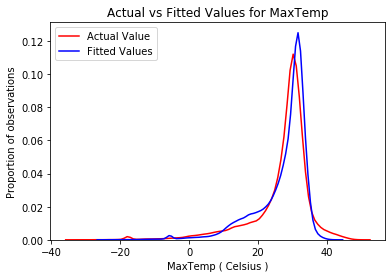

 31.128517    8704
 32.149206    8363
 31.638862    7797
 32.659551    6317
 30.107828    6282
              ... 
 41.845752       2
-22.457659       1
-23.988693       1
-21.947315       1
-24.499037       1
Name: predicted_value, Length: 132, dtype: int64

In [354]:
result_mintemp = pd.DataFrame(data = { 'actual_value': y, 'predicted_value': yhat3 })
result_mintemp

ax1 = sns.distplot(df['MaxTemp'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat3, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for MaxTemp')
plt.xlabel('MaxTemp ( Celsius )')
plt.ylabel('Proportion of observations')

plt.show()
plt.close()

result_mintemp['predicted_value'].value_counts()

In [355]:
lm3.coef_, lm3.intercept_

(array([0.91862017]), 10.714735533957164)

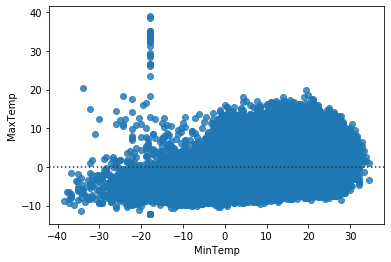

In [356]:
sns.residplot(df['MinTemp'], df['MaxTemp'])

In [357]:
#mse and R^2 of the model
r3 = lm3.score(x, y)
mse3 = mean_squared_error(df['MaxTemp'], yhat3)
print('R^2:', r3, 'MSE:', mse3)

R^2: 0.7765771155233692 MSE: 16.86752397560042


### Multiple regression model with Minimum Temperature, Snowfall, Precip, WindGustSpd as predictors

In [362]:
lm4 = LinearRegression()
lm4

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [363]:
z = df[['MinTemp', 'Snowfall', 'Precip']]
y = df['MaxTemp']

In [364]:
lm4.fit(z, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [365]:
yhat4 = lm4.predict(z)

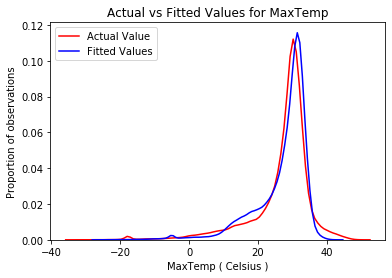

32.322334    4510
31.314443    4493
30.306552    3892
31.818388    3859
32.826279    3729
             ... 
0.146714        1
25.869531       1
10.486318       1
23.129827       1
7.583951        1
Name: predicted_value, Length: 7486, dtype: int64

In [366]:
result_mlr = pd.DataFrame(data = { 'actual_value': y, 'predicted_value': yhat4 })
result_mlr

#plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['MaxTemp'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat4, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for MaxTemp')
plt.xlabel('MaxTemp ( Celsius )')
plt.ylabel('Proportion of observations')

plt.show()
plt.close()

result_mlr['predicted_value'].value_counts()

In [367]:
lm4.coef_, lm4.intercept_

(array([ 0.907102  , -0.1883125 , -0.05912164]), 11.156620420522463)

In [370]:
#mse and R^2 of the model
r4 = lm4.score(z, y)
mse4 = mean_squared_error(df['MaxTemp'], yhat4)
print('R^2:', r4, 'MSE:', mse4)

R^2: 0.7849730241569535 MSE: 16.233666837350345


### Polynomial Regression model for Snowfall

In [372]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 80, 200)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for MaxTemp ~ Snowfall')
    ax = plt.gca()
    #ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Maximum Temperature')

    plt.show()
    plt.close()

In [373]:
x = df['Snowfall']
y = df['MaxTemp']

In [374]:
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

            11             10             9             8             7
-1.081e-14 x  + 5.011e-12 x  - 1.003e-09 x + 1.136e-07 x - 8.011e-06 x
              6           5          4         3         2
 + 0.0003646 x - 0.01076 x + 0.2011 x - 2.261 x + 13.91 x - 39.08 x + 27.73


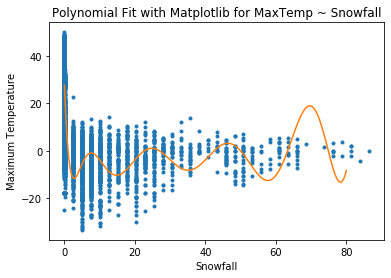

In [375]:
PlotPolly(p, x, y, 'Snowfall')

In [376]:
#mse and R^2 of the model
r5 = r2_score(y, p(x))
mse5 = mean_squared_error(df['MaxTemp'], p(x))
print('R^2:', r5, 'MSE:', mse5)

R^2: 0.2644794574859083 MSE: 55.5288255921731


## Polynomial Regression model for Precipitation

In [240]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 250, 200)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for MaxTemp ~ Precip')
    ax = plt.gca()
    #ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Maximum Temperature')

    plt.show()
    plt.close()

In [241]:
x = df['Precip']
y = df['MaxTemp']

In [242]:
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

            11             10             9             8             7
-2.539e-21 x  + 3.875e-18 x  - 2.538e-15 x + 9.342e-13 x - 2.122e-10 x
              6             5             4            3          2
 + 3.082e-08 x - 2.865e-06 x + 0.0001661 x - 0.005669 x + 0.1011 x - 0.6903 x + 27.26


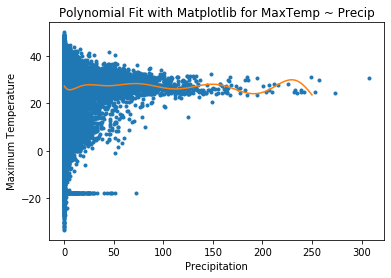

In [243]:
PlotPolly(p, x, y, 'Precipitation')

### Polynomial Regression model for Minimum Temperature

In [260]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(-35, 30, 200)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for MaxTemp ~ MinTemp')
    ax = plt.gca()
    #ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Maximum Temperature')

    plt.show()
    plt.close()

In [261]:
x = df['MinTemp']
y = df['MaxTemp']

In [289]:
f = np.polyfit(x, y, 11)
p = np.poly1d(f)
print(p)

            11             10             9            8             7
-9.319e-15 x  - 1.415e-13 x  + 2.582e-11 x + 2.57e-10 x - 2.511e-08 x
             6             5             4            3            2
 - 9.85e-08 x + 1.056e-05 x - 2.303e-05 x - 0.002296 x + 0.009336 x + 1.372 x + 8.962


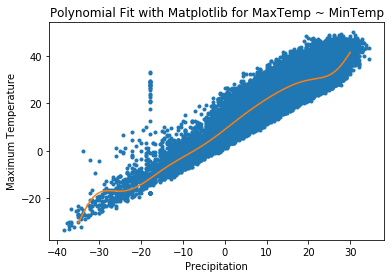

In [290]:
PlotPolly(p, x, y, 'Precipitation')

In [291]:
yhat5 = p(x)

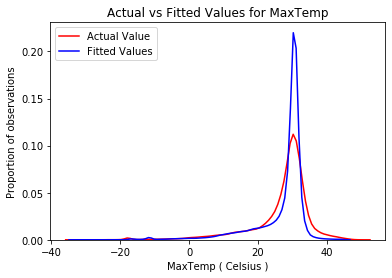

In [294]:
ax1 = sns.distplot(df['MaxTemp'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat5, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for MaxTemp')
plt.xlabel('MaxTemp ( Celsius )')
plt.ylabel('Proportion of observations')

plt.show()
plt.close()

# result_mlr['predicted_value'].value_counts()